In [1]:
import pandas as pd

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

df.head()



IncompleteRead: IncompleteRead(102844341 bytes read, 45090 more expected)

In [ ]:
# Number of rows before cleaning
print("Number of rows before cleaning:", len(df))

# Remove duplicates
df = df.drop_duplicates()

# Remove rows that don't have data on cases or deaths
df = df.dropna(subset=['total_cases', 'total_deaths'])

# Fill missing values in the 'continent' column (for organization purposes)
df['continent'] = df['continent'].fillna('Other')

# Number of rows after cleaning
print("Number of rows after cleaning:", len(df))



عدد الصفوف قبل التنظيف: 429435
عدد الصفوف بعد التنظيف: 411804


In [3]:
cases_deaths_by_country = df.groupby('location')[['total_cases', 'total_deaths']].max().sort_values(by='total_cases', ascending=False)
print(cases_deaths_by_country.head(10))  # أعلى 10 دول


                               total_cases  total_deaths
location                                                
World                          775866783.0     7057132.0
High-income countries          429044049.0     2997359.0
Asia                           301499099.0     1637249.0
Europe                         252916868.0     2102483.0
Upper-middle-income countries  251753518.0     2824452.0
European Union (27)            185822587.0     1262988.0
North America                  124492666.0     1671178.0
United States                  103436829.0     1193165.0
China                           99373219.0      122304.0
Lower-middle-income countries   91954400.0     1188026.0


In [4]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')


In [5]:
monthly_growth = df.groupby(['location', 'month'])['total_cases'].max().groupby(level=0).pct_change().dropna()
print(monthly_growth.head(10))


location     month  
Afghanistan  2020-03          inf
             2020-04    13.615385
             2020-05     9.859398
             2020-06     1.119781
             2020-07     0.177032
             2020-08     0.058469
             2020-09     0.027502
             2020-10     0.040212
             2020-11     0.127502
             2020-12     0.127964
Name: total_cases, dtype: float64


In [6]:
continent_summary = df.groupby('continent')[['total_cases', 'total_deaths']].max()
print(continent_summary)


               total_cases  total_deaths
continent                               
Africa           4072765.0      102595.0
Asia            99373219.0      533623.0
Europe          38997490.0      403188.0
North America  103436829.0     1193165.0
Oceania         11861161.0       25236.0
Other          775866783.0     7057132.0
South America   37511921.0      702116.0


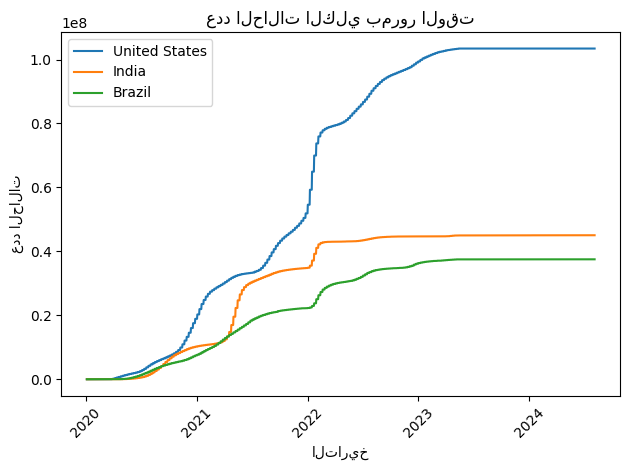

In [7]:
import matplotlib.pyplot as plt

countries = ['United States', 'India', 'Brazil']  # يمكنك تغييرها حسب ما تحب
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('عدد الحالات الكلي بمرور الوقت')
plt.xlabel('التاريخ')
plt.ylabel('عدد الحالات')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


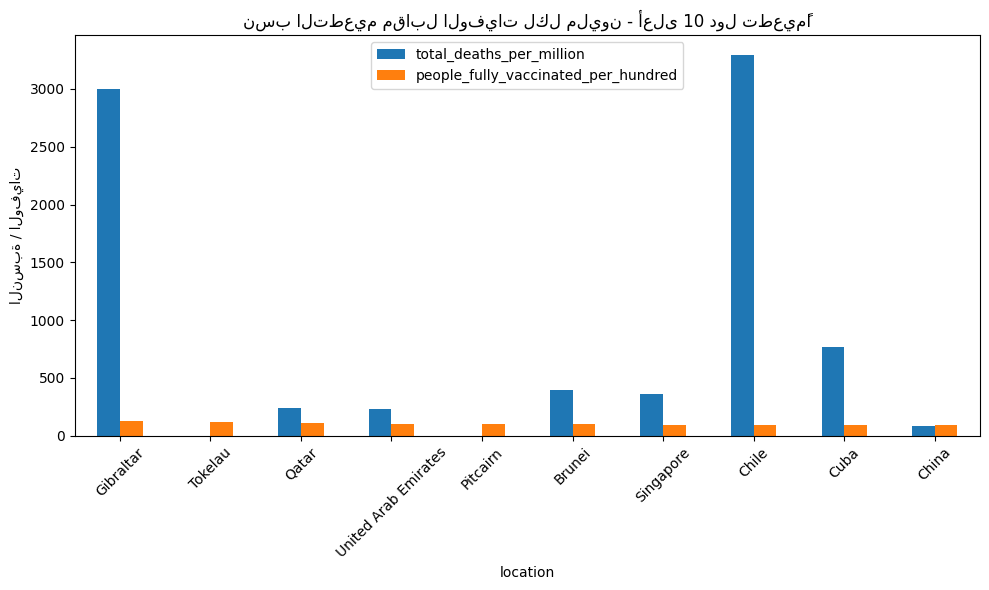

In [8]:
vaccination_vs_death = df.groupby('location')[['total_deaths_per_million', 'people_fully_vaccinated_per_hundred']].max().dropna()
top_10 = vaccination_vs_death.sort_values(by='people_fully_vaccinated_per_hundred', ascending=False).head(10)

top_10.plot(kind='bar', figsize=(10,6))
plt.title('نسب التطعيم مقابل الوفيات لكل مليون - أعلى 10 دول تطعيمًا')
plt.ylabel('النسبة / الوفيات')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


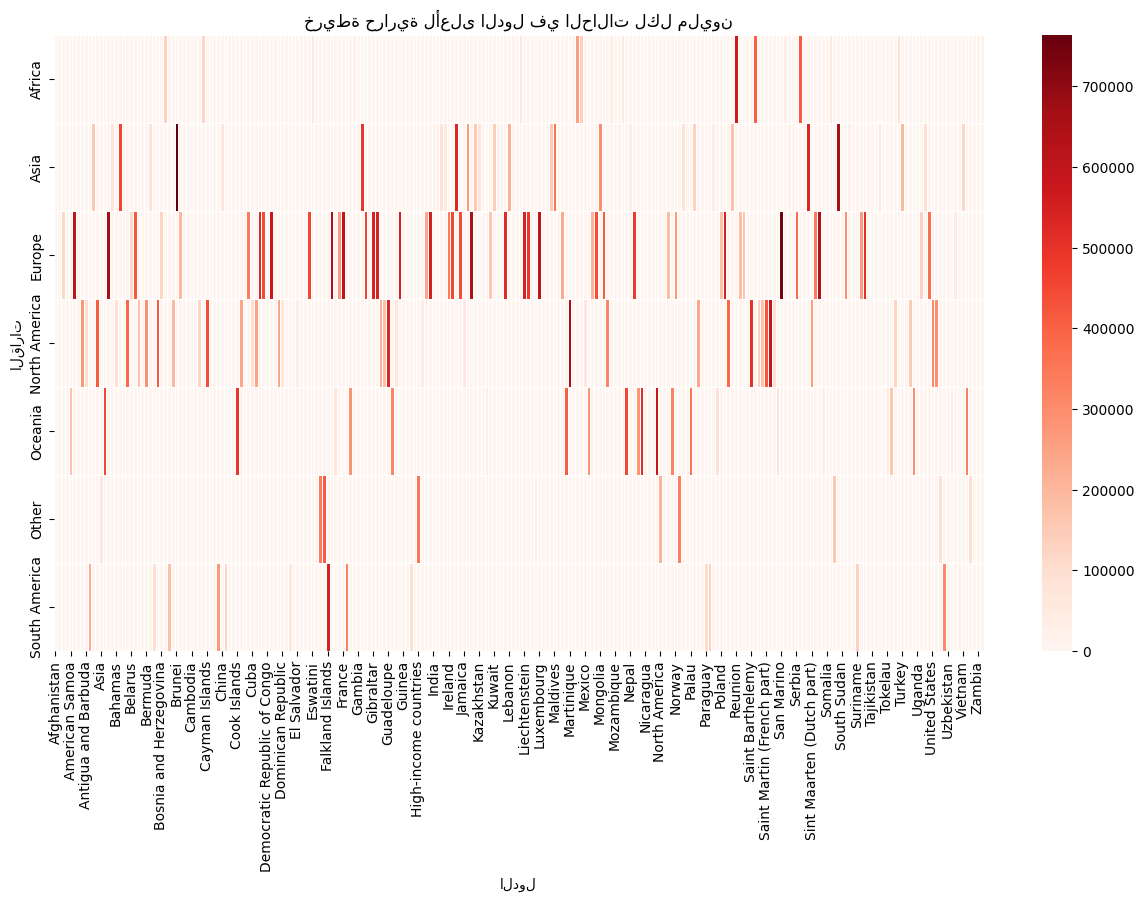

In [9]:
import seaborn as sns

heatmap_data = df.groupby(['continent', 'location'])['total_cases_per_million'].max().unstack().fillna(0)
plt.figure(figsize=(15,8))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5)
plt.title('خريطة حرارية لأعلى الدول في الحالات لكل مليون')
plt.xlabel('الدول')
plt.ylabel('القارات')
plt.show()
